### Locally Weighted Regression
1) Read and Normalise the Dataset

2) Generate W for every query point!

3) No training is involved, directly make predictions using closed form solution we dervied!

(X′WX)inv * X′WY where X' is X_Transpose

4) Find the best value of Tau(Bandwidth Parameter) [Cross Validation]

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
x = pd.read_csv('weightedX.csv')
y = pd.read_csv('weightedY.csv')

In [42]:
x = x.values
y = y.values

In [43]:
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


In [44]:
x = (x - x.mean())/x.std()

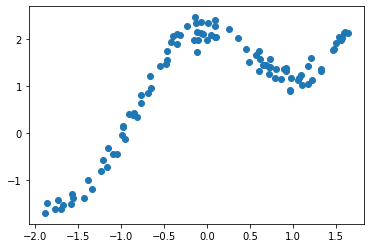

In [45]:
plt.scatter(x, y)

In [10]:
# a*b --> a, b --> matrices --> matrix mutiplication
# a*b --> a, b --> matrices --> element wise multiplication

In [13]:
ut

In [46]:
x = np.mat(x)
y = np.mat(y)
w = getw(-1, x, 100)
print(w)

[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


###### Make prediction

In [47]:
def predict(x, y, query_x, tau):
    ones = np.ones((x.shape[0], 1))
    x_ = np.hstack((x, ones))
    qx = np.mat([query_x, 1])
    w = getw(qx, x_, tau)
    theta = np.linalg.pinv(x_.T*(w*x_))*(x_.T*(w*y))
    pred = np.dot(qx, theta)
    return pred

In [48]:
pred = predict(x, y, 1.0, 1.0)
print(pred)

[[1.59417694]]


##### visualizing predictions

In [59]:
def plotprediction(x, y, tau):
    x_test = np.linspace(-2, 2, 20)
    y_test = []
    for xq in x_test:
        pred = predict(x, y, xq, tau)
        y_test.append(pred[0])
    y_test = np.array(y_test)
    xo = np.array(x)
    yo = np.array(y)
    plt.title("Tau: %.2f"%tau )
    plt.scatter(xo, yo)
    plt.scatter(x_test, y_test, color = 'r')
    plt.show()

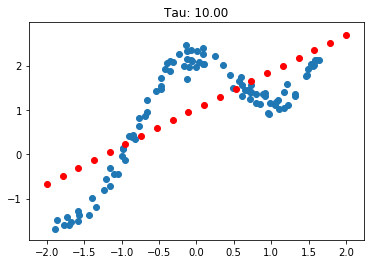

In [60]:
plotprediction(x, y, 10)

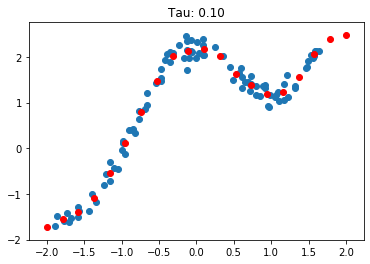

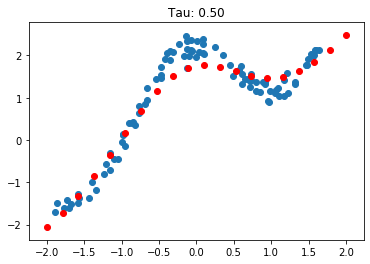

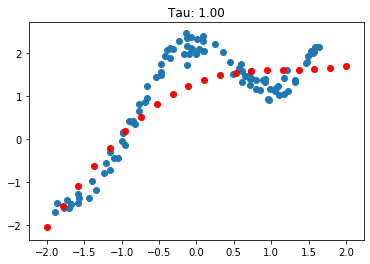

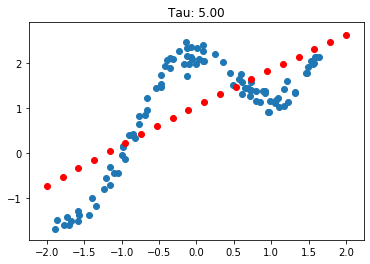

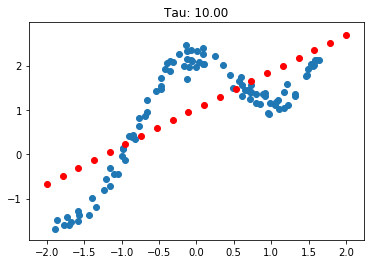

In [61]:
taus = [0.1, 0.5, 1, 5, 10]
for t in taus:
    plotprediction(x, y, t)